In [80]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pylab
# Set default matplot figure size
pylab.rcParams['figure.figsize'] = (6.25, 5.0)


# Data set characteristics:

In [79]:
credit = pd.read_csv("default of credit card clients.csv", header = 1)
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# Initial statistics of the data
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [5]:
#Data attributes:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [87]:
#Renaming dependant attributes for simplicity
credit = credit.rename(columns = {'default payment next month': 'Default'})

In [7]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

# Dependent parameter - Default Payment rate

In [446]:
credit.groupby('Default')['Default'].count()


Default
0    23364
1     6636
Name: Default, dtype: int64

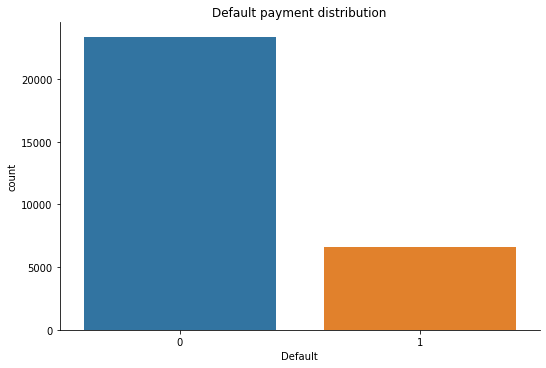

In [9]:
sns.catplot('Default', data=credit, kind='count', aspect=1.5)
plt.title('Default payment distribution')
plt.show()

- Data contains mostly non-defaulting examples

# Demographic attributes and Defaulting rate

## Gender

In [296]:
#Creating a categorical gender attribute
credit['Gender'] = credit['SEX'].astype('category')
credit['Gender'] = credit['Gender'].cat.rename_categories({1:'Male',2:'Female'})
#Creating a categorical Marital status attribute
credit['Marriage'] = credit['MARRIAGE'].astype('category')
credit['Marriage'] = credit['Marriage'].cat.rename_categories({1:'Married',2:'Single',3 : 'Divorced',0: 'Other'})
#credit['Marriage'].cat.categories

Gender
Male      11888
Female    18112
Name: Gender, dtype: int64


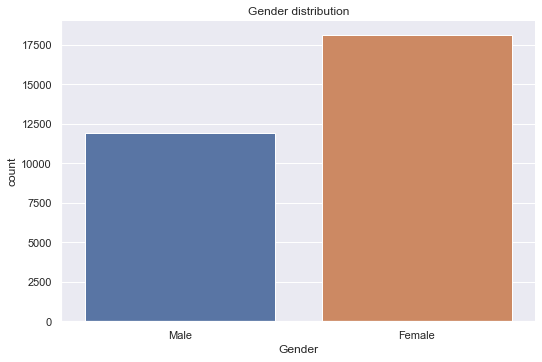

In [250]:
print(credit.groupby('Gender')['Gender'].count())
sns.catplot('Gender', data=credit, kind='count', aspect=1.5)
plt.title('Gender distribution')
plt.show()

In [305]:
pd.pivot_table(credit, index = 'Default', columns = 'Gender' ,values = 'SEX', aggfunc = 'count', margins = True)#.plot(kind = 'bar')


Gender,Male,Female,All
Default,,,
0,9015,14349,23364
1,2873,3763,6636
All,11888,18112,30000


In [307]:
## probability of defaulting
credit.groupby('Gender')[['Default']].mean()

,Default
Gender,
Male,0.241672
Female,0.207763


         Default
Gender          
Male    0.241672
Female  0.207763


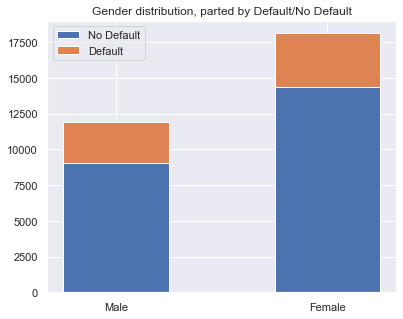

In [309]:
## probability of defaulting
print(credit.groupby('Gender')[['Default']].mean())
vals = pd.pivot_table(credit,index = 'Gender',columns = 'Default',values = 'SEX', aggfunc = 'count')
#sns.catplot('Default', data=credit, hue='Gender', kind='count', aspect=1.75)
plt.title('Gender distribution, parted by Default/No Default')

plt.bar(['Male','Female'],vals[0],0.5)
plt.bar(['Male','Female'], vals[1],0.5, bottom = vals[0])
plt.legend(['No Default','Default'])
plt.show()

- Statistically- men default more (1:4) than women (1:5)

## Marital status

Marriage
Other          54
Married     13659
Single      15964
Divorced      323
Name: Marriage, dtype: int64


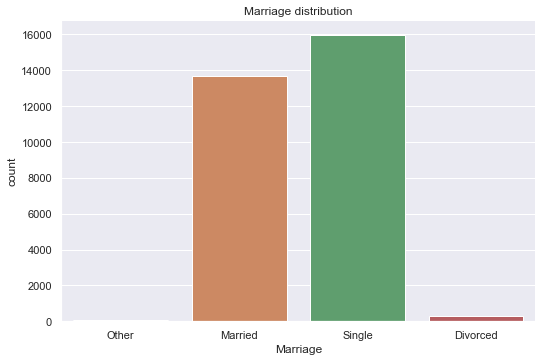

In [297]:
print(credit.groupby('Marriage')['Marriage'].count())
sns.catplot('Marriage', data=credit, kind='count', aspect=1.5)
plt.title('Marriage distribution')
plt.show()

In [244]:
credit.groupby('Marriage')[['Default']].mean()

,Default
Marriage,
Other,0.092593
Married,0.234717
Single,0.209283
Divorced,0.260062


- Divorced are most likely to default, married default more than singles

## Education level

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64


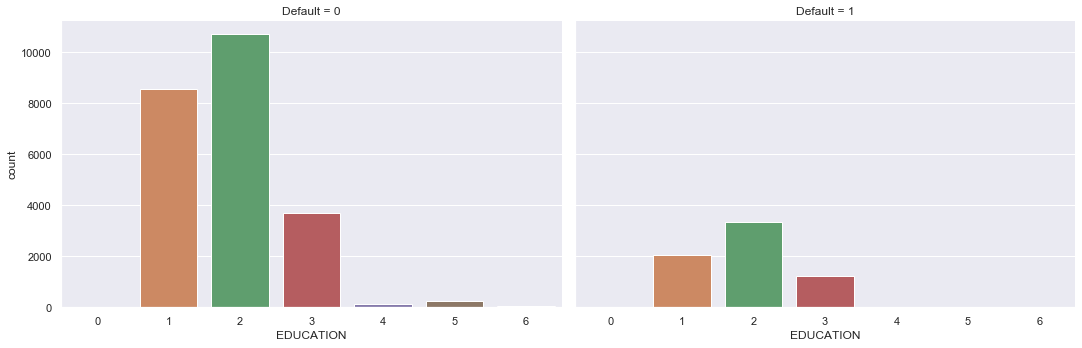

In [302]:
print(credit.groupby('EDUCATION')['EDUCATION'].count())
sns.catplot('EDUCATION', data=credit, kind='count', col='Default', aspect=1.5)
#sns.catplot('Binned_Limit_Bal', data=credit,hue='Default',col= 'Gender', kind='count', aspect = 1.75)
#plt.title('EDUCATION distribution')
plt.show()

In [247]:
credit.groupby('EDUCATION')[['Default']].mean()

,Default
EDUCATION,
0,0.000000
1,0.192348
2,0.237349
3,0.251576
4,0.056911
5,0.064286
6,0.156863


- Default rate decreases with education (levels 1,2,3 only)

## Age

In [335]:
#Adding a binned age attribute
credit['Binned_Age'] = pd.cut(credit.AGE, bins =[20,25,30,35,40,50,60,80], 
                              labels = ['20-24','25-29','30-34','35-39','40-49','50-59','60-79'], include_lowest = True)
credit['Binned_Limit_Bal'] = pd.cut(credit.LIMIT_BAL, bins = [10000,100000,200000,300000,500000,1000000],
                                    labels = ['<100k','100k-200k','200k-300k','300k-500k','>500k'],include_lowest = True)


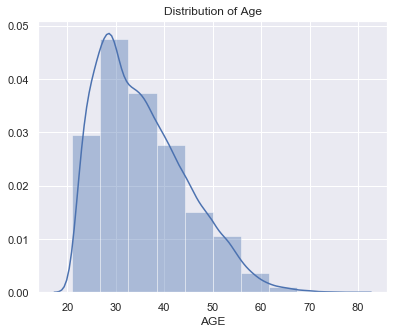

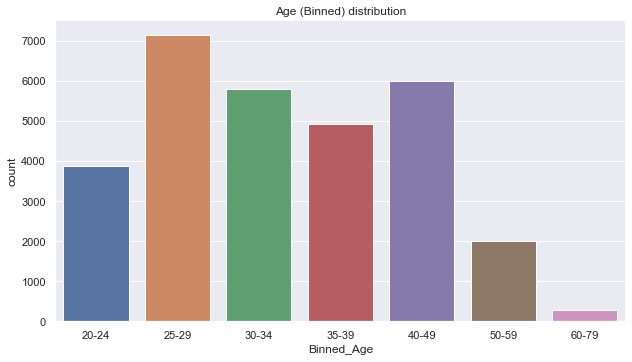

In [336]:
limbal_dist = sns.distplot(Age, bins = 10)
limbal_dist.set_title("Distribution of Age")
plt.show()
sns.catplot('Binned_Age', data=credit, kind='count', aspect=1.75)
plt.title('Age (Binned) distribution')
plt.show()
Age = credit.AGE
# Distribution of limit balance, with an overlay of a density plot


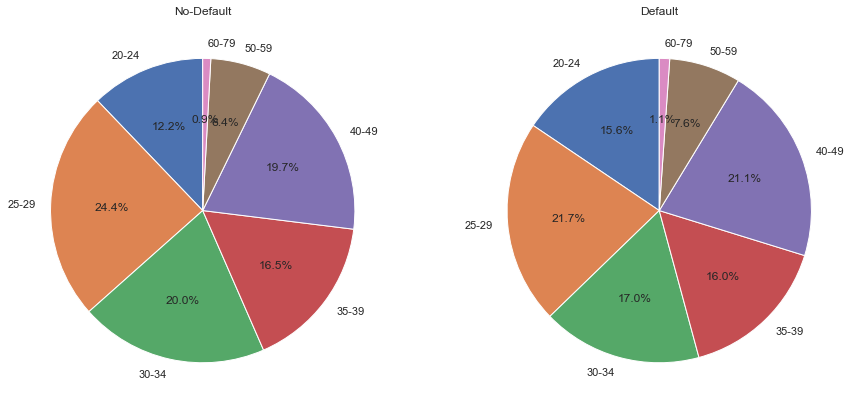

In [337]:

values = pd.pivot_table(credit, index = 'Binned_Age',columns = 'Default',values = 'SEX',aggfunc = 'count')
#print(values[1])
#fix,ax = plt.subplots(1,2)
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.pie(values[0], labels = credit.Binned_Age.cat.categories, autopct='%1.1f%%', startangle=90  )
plt.title('No-Default')
plt.subplot(122)
plt.pie(values[1], labels = credit.Binned_Age.cat.categories, autopct='%1.1f%%', startangle=90  )
plt.title('Default')
plt.show()




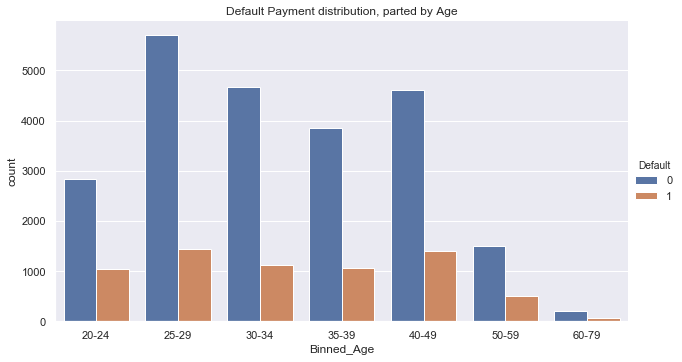

In [340]:
sns.catplot('Binned_Age', data=credit, hue='Default', kind='count', aspect=1.75)
plt.title('Default Payment distribution, parted by Age')
plt.show()

In [339]:
credit.groupby('Binned_Age')[['Default']].mean()

,Default
Binned_Age,
20-24,0.266598
25-29,0.201484
30-34,0.194272
35-39,0.216189
40-49,0.232973
50-59,0.252379
60-79,0.268382


- Probalbilty of defaulting drops with age between 20-35, then rises again between 35-80

## Limit balance

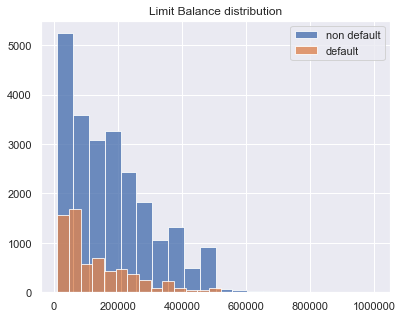

In [322]:
plt.hist(credit.loc[credit.Default == 0,'LIMIT_BAL'], alpha = 0.8,bins = 20, label = 'non default')
plt.hist(credit.loc[credit.Default == 1,'LIMIT_BAL'], alpha = 0.8,bins = 20, label = 'default')
plt.title('Limit Balance distribution')
plt.legend()
plt.show()


In [248]:
credit.groupby('Binned_Limit_Bal')[['Default']].mean()

,Default
Binned_Limit_Bal,
<100k,0.294767
100k-200k,0.194797
200k-300k,0.160506
300k-500k,0.133578
>500k,0.111650


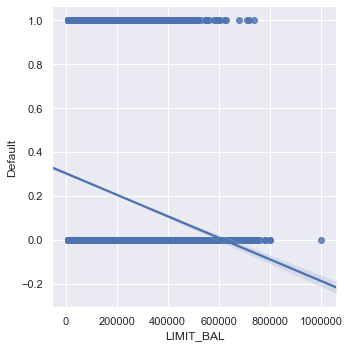

In [464]:
sns.lmplot('LIMIT_BAL', 'Default', data=credit)


- Default probability decreases with limit balance

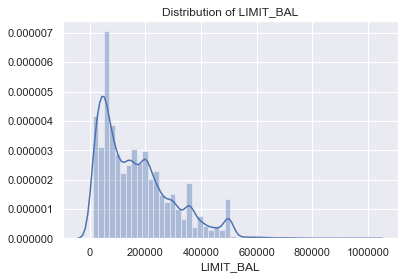

In [14]:
limbal = credit.LIMIT_BAL
# Distribution of limit balance, with an overlay of a density plot
limbal_dist = sns.distplot(limbal)
limbal_dist.set_title("Distribution of LIMIT_BAL")
plt.show()

# Relationship between attributes

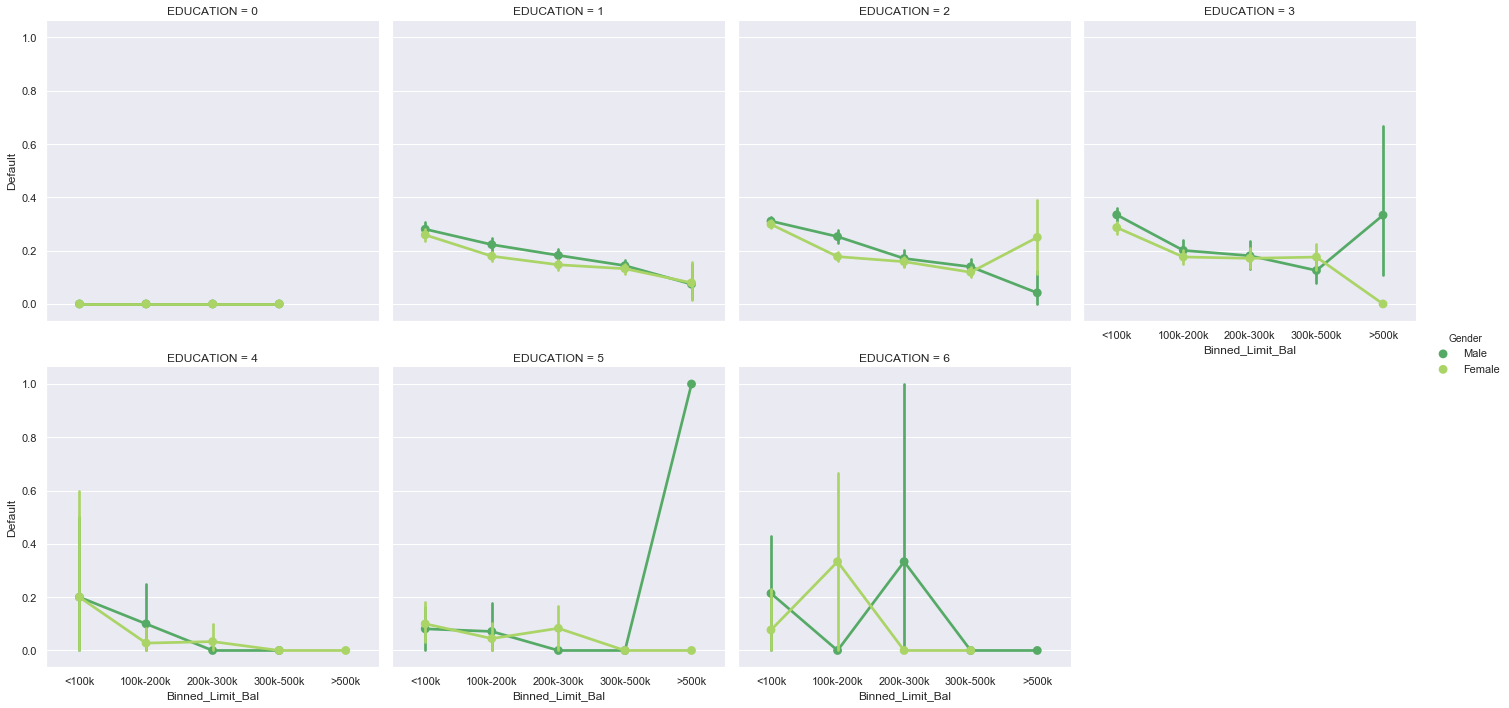

In [492]:
sns.catplot('Binned_Limit_Bal', 'Default', data=credit, palette='summer', hue='Gender', 
                col='EDUCATION', kind = 'point', col_wrap = 4)

- There are no females with education = 0
- Men with education = 0 do not default
- Males with limit balance >500K and Education = 5 ALWAYS default, in a complete contradiction to the rest of the population

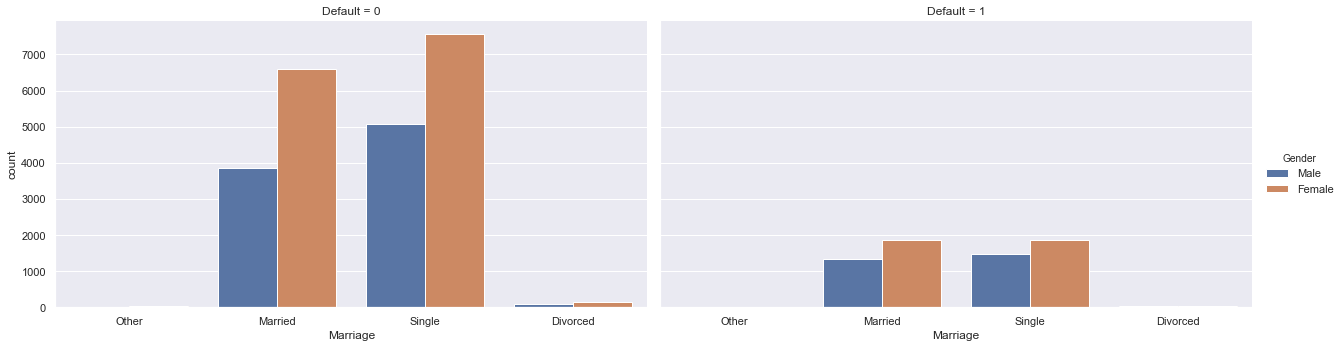

In [342]:
sns.catplot('Marriage', data=credit,hue='Gender',col= 'Default', kind='count', aspect = 1.75)
#plt.title('Binned Limit Balance, split by default payment')
plt.show()

In [326]:
credit.pivot_table('Default', 'Gender', 'Marriage', aggfunc=np.mean)

Marriage,Other,Married,Single,Divorced
Gender,,,,
Male,0.142857,0.259345,0.226614,0.305344
Female,0.075000,0.219625,0.197216,0.229167


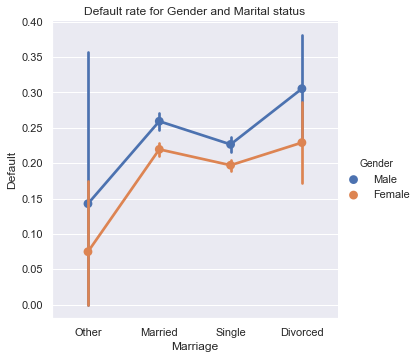

In [580]:
sns.catplot('Marriage','Default', hue='Gender', data=credit, kind = 'point')
plt.title('Default rate for Gender and Marital status')
plt.show()

- Divorced men default the most, followed by married men and single men. Large error bar are expected in the "Divorced" and "Other" groups due to the small group sizes.  

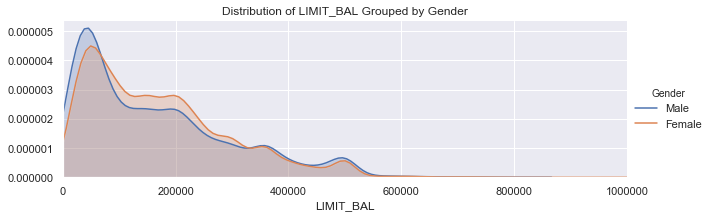

In [448]:
fig = sns.FacetGrid(credit, hue='Gender', aspect=3)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade=True)
oldest = credit['LIMIT_BAL'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of LIMIT_BAL Grouped by Gender')
fig.add_legend()
plt.show()

- Men receive slightly more lower limit loans them women

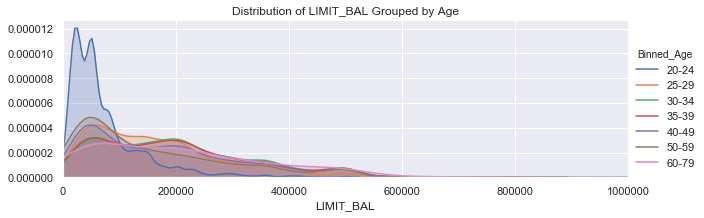

In [362]:
fig = sns.FacetGrid(credit, hue='Binned_Age', aspect=3)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade=True)
oldest = credit['LIMIT_BAL'].max()
fig.set(title='Distribution of LIMIT_BAL Grouped by Age')
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()

- Young adults(20-25) has more lower limit balance loans then any other age group

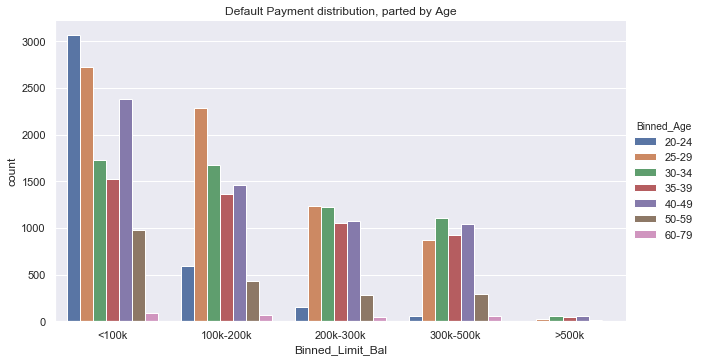

In [374]:
sns.catplot('Binned_Limit_Bal', data=credit, hue='Binned_Age', kind='count', aspect=1.75)
plt.title('Default Payment distribution, parted by Age')
plt.show()


In [420]:
pd.crosstab(index=[credit.Binned_Age], columns=[credit.Binned_Limit_Bal])

Binned_Limit_Bal,<100k,100k-200k,200k-300k,300k-500k,>500k
Binned_Age,,,,,
20-24,3066,596,149,60,0
25-29,2728,2286,1236,867,25
30-34,1726,1674,1225,1110,61
35-39,1529,1365,1051,926,46
40-49,2381,1455,1072,1045,52
50-59,975,435,278,292,17
60-79,93,69,48,57,5


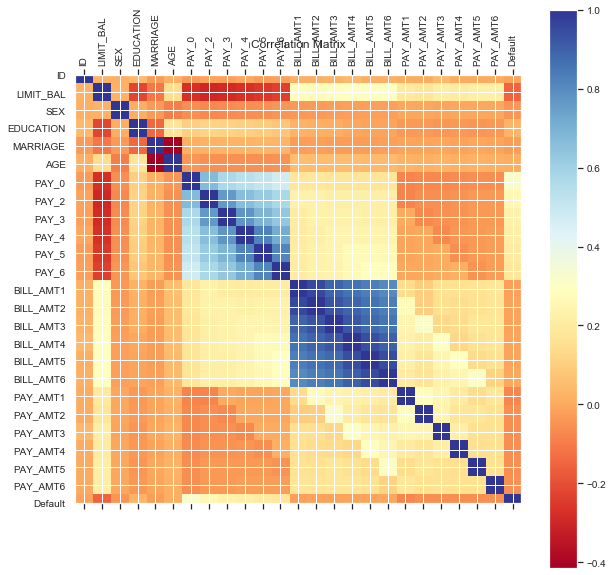

In [419]:
corrMat = credit.corr()
f = plt.figure(figsize=(10, 10))
pos = plt.matshow(corrMat, fignum = f.number, cmap = 'RdYlBu')
plt.xticks(range(25), credit.columns[0:25], fontsize=10, rotation=90)
plt.yticks(range(25), credit.columns[0:25], fontsize=10)
cb = plt.colorbar(pos )
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=12);

plt.show()

#corrMat.style.background_gradient(cmap='coolwarm',axis = None). set_precision(3)

In [28]:
covMat = credit.cov()
covMat.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
ID,7.500250e+07,2.941664e+07,78.356379,268.154338,-131.452515,1491.057019,-297.572636,-116.276959,-191.692156,-27.691323,...,2.248126e+07,8.795803e+06,8.628506e+06,1.397501e+06,1.677383e+06,5.969803e+06,1.057334e+06,8.629502e+04,4.618460e+05,-50.151705
LIMIT_BAL,2.941664e+07,1.683446e+10,1571.050630,-22474.028945,-7323.669658,173076.722569,-39545.930009,-46037.648360,-44432.253315,-40571.811859,...,2.453926e+09,2.331481e+09,2.243837e+09,4.195711e+08,5.333504e+08,4.801180e+08,4.131202e+08,4.305657e+08,5.065153e+08,-8267.551759
SEX,7.835638e+01,1.571051e+03,0.239247,0.005502,-0.008014,-0.409726,-0.031685,-0.041442,-0.038694,-0.034411,...,-6.884896e+02,-5.056943e+02,-4.874302e+02,-1.964266e+00,-1.567550e+01,-7.403481e+01,-1.708011e+01,-1.245881e+01,-2.405188e+01,-0.008113
EDUCATION,2.681543e+02,-2.247403e+04,0.005502,0.624651,-0.059184,1.275380,0.093584,0.115025,0.107861,0.100528,...,-2.294883e+01,-3.635777e+02,-4.282742e+02,-4.903302e+02,-5.470050e+02,-5.558343e+02,-4.732070e+02,-4.873359e+02,-5.226734e+02,0.009187
MARRIAGE,-1.314525e+02,-7.323670e+03,-0.008014,-0.059184,0.272452,-1.992764,0.011683,0.015122,0.020421,0.020213,...,-7.838816e+02,-8.058409e+02,-6.592233e+02,-5.169161e+01,-9.732797e+01,-3.254608e+01,-1.035182e+02,-9.607709e+00,-6.162327e+01,-0.005273


# Payment & Billing attributes

In [423]:
PayRecord = credit[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','Default'] ]
BillAmount = credit[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'Default']]
PayAmount = credit[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','Default']]

In [433]:
BillAmountCor = BillAmount.corr()
BillAmountCor>0.95

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,Default
BILL_AMT1,True,True,False,False,False,False,False
BILL_AMT2,True,True,False,False,False,False,False
BILL_AMT3,False,False,True,False,False,False,False
BILL_AMT4,False,False,False,True,False,False,False
BILL_AMT5,False,False,False,False,True,False,False
BILL_AMT6,False,False,False,False,False,True,False
Default,False,False,False,False,False,False,True


In [444]:
BillAmountCor.style.background_gradient(cmap='rainbow',axis = None). set_precision(3)

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,Default
BILL_AMT1,1,0.951,0.892,0.86,0.83,0.803,-0.0196
BILL_AMT2,0.951,1,0.928,0.892,0.86,0.832,-0.0142
BILL_AMT3,0.892,0.928,1,0.924,0.884,0.853,-0.0141
BILL_AMT4,0.86,0.892,0.924,1,0.94,0.901,-0.0102
BILL_AMT5,0.83,0.86,0.884,0.94,1,0.946,-0.00676
BILL_AMT6,0.803,0.832,0.853,0.901,0.946,1,-0.00537
Default,-0.0196,-0.0142,-0.0141,-0.0102,-0.00676,-0.00537,1


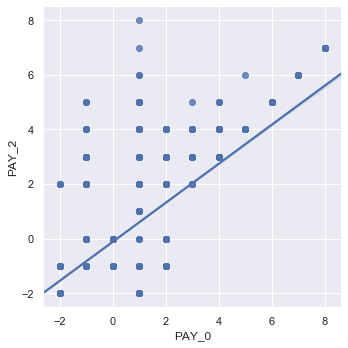

In [496]:
sns.lmplot('PAY_0', 'PAY_2', data=credit)

In [541]:
PayRecord.describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,0.221200
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,0.415062
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000


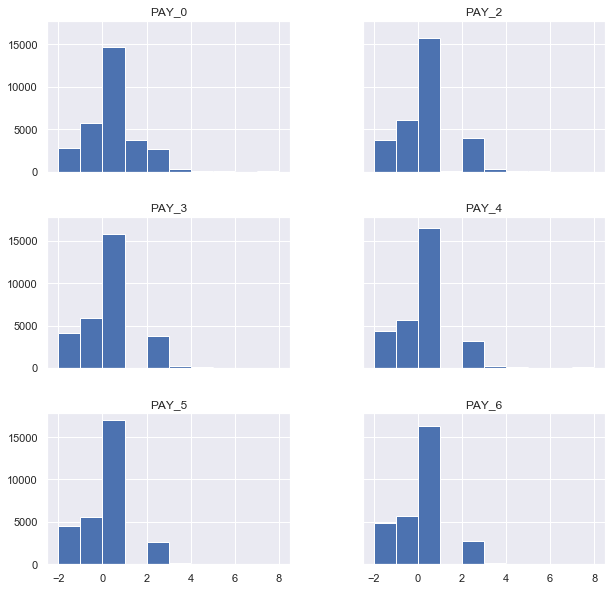

In [574]:
#g = sns.pairplot(PayRecord, vars = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], hue = 'Default')
#g.map_diag(plt.hist, alpha = 0.8)
#g.map_offdiag(plt.scatter)
PayRecord.hist(column = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], sharex = True, sharey = True, figsize = (10,10))
plt.show()

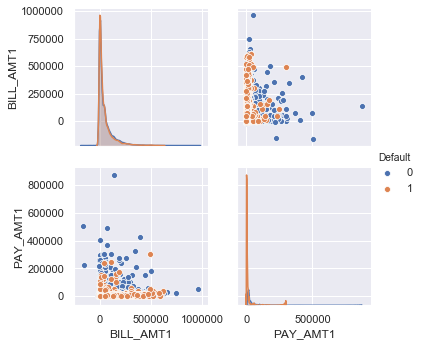

In [579]:
g = sns.pairplot(credit, vars = ['BILL_AMT1', 'PAY_AMT1'], hue = 'Default')

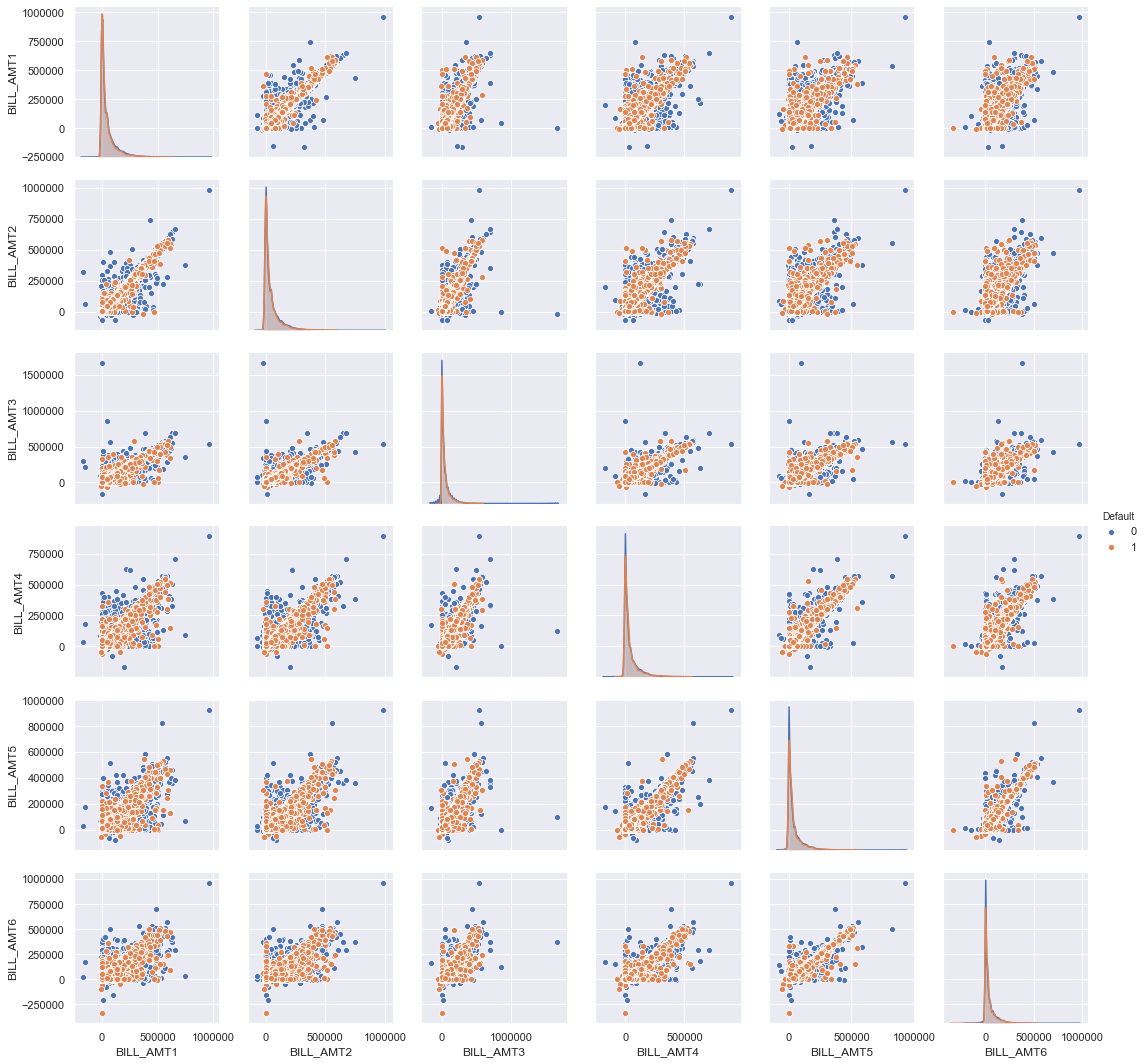

In [562]:
g = sns.pairplot(BillAmount, vars = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], hue = 'Default')